In [34]:
pip install optuna


   ---------------------------------------- 0.0/383.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/383.6 kB ? eta -:--:--
   ------ --------------------------------- 61.4/383.6 kB 1.1 MB/s eta 0:00:01
   ----------------- ---------------------- 163.8/383.6 kB 1.6 MB/s eta 0:00:01
   ------------------ --------------------- 174.1/383.6 kB 1.5 MB/s eta 0:00:01
   ---------------------------- ----------- 276.5/383.6 kB 1.7 MB/s eta 0:00:01
   -------------------------------------- - 368.6/383.6 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 383.6/383.6 kB 1.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/231.8 kB ? eta -:--:--
   ----------------- ---------------------- 102.4/231.8 kB 2.0 MB/s eta 0:00:01
   ----------------------------------- ---- 204.8/231.8 kB 3.1 MB/s eta 0:00:01
   ---------------------------------------- 231.8/231.8 kB 1.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/78.5 kB ? eta -:--:-

In [20]:
import pandas as pd
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
d_train= pd.read_csv(r"C:\Users\Aditi\Downloads\final_train1.csv")
d_test=pd.read_csv(r"C:\Users\Aditi\Downloads\final_test1.csv")

In [42]:
d_train.columns

Index(['HH Size (For FDQ)', 'Male_Count', 'Female_Count', 'Other_Count',
       'Age_0_18', 'Age_18_60', 'Age_60_above',
       'Highest educational level attained_head',
       'Total year of education completed_head',
       'Highest educational level attained_median',
       ...
       'Unnamed: 402', 'Unnamed: 403', 'Unnamed: 404', 'Unnamed: 405',
       'Unnamed: 406', 'Unnamed: 407', 'Unnamed: 408', 'Unnamed: 409',
       'Unnamed: 410', 'Unnamed: 411'],
      dtype='object', length=412)

In [23]:
d_test.columns

Index(['HH Size (For FDQ)', 'Male_Count', 'Female_Count', 'Other_Count',
       'Age_0_18', 'Age_18_60', 'Age_60_above',
       'Highest educational level attained_head',
       'Total year of education completed_head',
       'Highest educational level attained_median',
       ...
       'Marital Status_head_2.1', 'Marital Status_head_3.1',
       'Marital Status_head_4.1',
       'Whether used internet from any location during last 30 days_1.1',
       'Whether used internet from any location during last 30 days_2.1',
       'Unnamed: 407', 'Unnamed: 408', 'Unnamed: 409', 'Unnamed: 410',
       'Unnamed: 411'],
      dtype='object', length=412)

In [43]:
d_train=d_train.drop(columns=["HH_ID","Unnamed: 0"],errors="ignore")

In [44]:
d_test=d_test.drop(columns=["HH_ID","Unnamed: 0"],errors="ignore")

In [45]:
d_test.head()

,HH Size (For FDQ),Male_Count,Female_Count,Other_Count,Age_0_18,Age_18_60,Age_60_above,Highest educational level attained_head,Total year of education completed_head,Highest educational level attained_median,...,Unnamed: 402,Unnamed: 403,Unnamed: 404,Unnamed: 405,Unnamed: 406,Unnamed: 407,Unnamed: 408,Unnamed: 409,Unnamed: 410,Unnamed: 411
0,2,1,1,0,0,1,1,4,7,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,2,2,0,2,2,0,7,13,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,2,0,2,1,0,1,0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,3,0,1,2,1,11,18,8.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,1,2,0,0,3,0,3,4,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
d_train = d_train.drop(columns=["Unnamed: 0"], errors="ignore")

In [47]:
d_test = d_test.drop(columns=["Unnamed: 0"], errors="ignore")

In [48]:
d_test.head()

,HH Size (For FDQ),Male_Count,Female_Count,Other_Count,Age_0_18,Age_18_60,Age_60_above,Highest educational level attained_head,Total year of education completed_head,Highest educational level attained_median,...,Unnamed: 402,Unnamed: 403,Unnamed: 404,Unnamed: 405,Unnamed: 406,Unnamed: 407,Unnamed: 408,Unnamed: 409,Unnamed: 410,Unnamed: 411
0,2,1,1,0,0,1,1,4,7,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,2,2,0,2,2,0,7,13,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,2,0,2,1,0,1,0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,3,0,1,2,1,11,18,8.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,1,2,0,0,3,0,3,4,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
d_log_test= pd.read_excel(r"C:\Users\Aditi\Downloads\Target_test.xlsx")

In [65]:
log_test=d_log_test["log_totalexpense"]

In [66]:
log_test

0         8.377477
1         9.443923
2         9.380547
3        10.135567
4         9.553327
           ...    
52345     9.271024
52346     9.601100
52347    10.355267
52348     9.280217
52349     9.607088
Name: log_totalexpense, Length: 52350, dtype: float64

In [67]:
d_log_train=pd.read_excel(r"C:\Users\Aditi\Downloads\Target_train.xlsx")

In [68]:
log_train=d_log_train["log_TotalExpense"]

In [70]:
d_log_train.head()

,TotalExpense,log_TotalExpense
0,4252.405088,8.355240
1,4900.391389,8.497070
2,34304.682970,10.443037
3,18091.958900,9.803223
4,23454.688850,10.062826


In [54]:
# Define X (features) and y (target)
X_train = d_train  # Use all features except TotalExpense
y_train = log_train # Log-transformed target

X_test = d_test  # Use all features except TotalExpense
y_test = log_test  # Log-transformed target


In [37]:
X_train.columns
X_test.columns

Index(['HH Size (For FDQ)', 'Male_Count', 'Female_Count', 'Other_Count',
       'Age_0_18', 'Age_18_60', 'Age_60_above',
       'Highest educational level attained_head',
       'Total year of education completed_head',
       'Highest educational level attained_median',
       ...
       'Marital Status_head_2.1', 'Marital Status_head_3.1',
       'Marital Status_head_4.1',
       'Whether used internet from any location during last 30 days_1.1',
       'Whether used internet from any location during last 30 days_2.1',
       'Unnamed: 407', 'Unnamed: 408', 'Unnamed: 409', 'Unnamed: 410',
       'Unnamed: 411'],
      dtype='object', length=412)

In [72]:
#Convert categorical columns to category dtype
categorical_cols = X_train.select_dtypes(include=['object']).columns
X_train[categorical_cols] = X_train[categorical_cols].astype("category")
X_test[categorical_cols] = X_test[categorical_cols].astype("category")


In [73]:
# Identify object (string) columns
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# Convert categorical columns to category dtype
for col in categorical_cols:
    X_train[col] = X_train[col].astype("category")
    X_test[col] = X_test[col].astype("category")

In [57]:
# Define features (X) and target variable (y)
# target_column = "TotalExpense"  # Replace with actual target column name
# X = d_train.drop(columns=[target_column])
# y =log_test

# Define X (features) and y (target)
X_train = d_train  # Use all features except TotalExpense
y_train = log_train # Log-transformed target

X_test = d_test  # Use all features except TotalExpense
y_test = log_test  # Log-transformed target

# Initialize models
models = {
    "XGBoost": xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42),
    "LightGBM": lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42),
    "CatBoost": cb.CatBoostRegressor(n_estimators=100, learning_rate=0.1, depth=6, verbose=0, random_state=42),
    
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"RMSE": rmse, "R² Score": r2}
    print(f"{name} → RMSE: {rmse:.4f}, R² Score: {r2:.4f}")

# Stacking Model (Combining all models)
stacking = StackingRegressor(
    estimators=[(name, models[name]) for name in models],
    final_estimator=Ridge(alpha=1.0)
)
stacking.fit(X_train, y_train)
y_pred_stacking = stacking.predict(X_test)
rmse_stacking = mean_squared_error(y_test, y_pred_stacking, squared=False)
r2_stacking = r2_score(y_test, y_pred_stacking)

print(f"Stacking Model → RMSE: {rmse_stacking:.4f}, R² Score: {r2_stacking:.4f}")

C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


XGBoost → RMSE: 0.3305, R² Score: 0.6870


LightGBMError: Do not support special JSON characters in feature name.

In [47]:
# Initialize Decision Tree Regressor
dt_model = DecisionTreeRegressor(max_depth=6, random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on test set
y_pred_log = dt_model.predict(X_test)

# Convert predictions back to original scale
y_pred_original = np.expm1(y_pred_log)
y_test_original = np.expm1(y_test)

# Evaluate Model Performance
rmse = mean_squared_error(y_test_original, y_pred_original, squared=False)
r2 = r2_score(y_test_original, y_pred_original)

print(f"Decision Tree on Log-Transformed Target → RMSE: {rmse:.4f}, R² Score: {r2:.4f}")

Decision Tree on Log-Transformed Target → RMSE: 10463.4953, R² Score: 0.4118


C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

# Load dataset
d_train = pd.read_csv("your_train_data.csv")
d_test = pd.read_csv("your_test_data.csv")

# Apply log transformation to the target variable
d_train["Log_TotalExpense"] = np.log1p(d_train["TotalExpense"])
d_test["Log_TotalExpense"] = np.log1p(d_test["TotalExpense"])

# Drop ID columns and define features & target
X_train = d_train.drop(columns=["TotalExpense", "HH_ID"], errors="ignore")
y_train = d_train["Log_TotalExpense"]
X_test = d_test.drop(columns=["TotalExpense", "HH_ID"], errors="ignore")
y_test = d_test["Log_TotalExpense"]

# Standardize features (important for ANN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01),
    "DecisionTree": DecisionTreeRegressor(max_depth=6, random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=100, max_depth=6, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42),
    "LightGBM": lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42),
    "CatBoost": cb.CatBoostRegressor(n_estimators=100, learning_rate=0.1, depth=6, verbose=0, random_state=42),
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_original = np.expm1(y_pred)  # Convert log predictions back
    y_test_original = np.expm1(y_test)
    rmse = mean_squared_error(y_test_original, y_pred_original, squared=False)
    r2 = r2_score(y_test_original, y_pred_original)
    results[name] = {"RMSE": rmse, "R² Score": r2}
    print(f"{name} → RMSE: {rmse:.4f}, R² Score: {r2:.4f}")

# Train ANN Model
ann_model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1)  # Single output for regression
])

ann_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = ann_model.fit(X_train_scaled, y_train, epochs=200, batch_size=64, validation_data=(X_test_scaled, y_test), 
                        callbacks=[early_stop], verbose=1)

# Predict with ANN
y_pred_ann = ann_model.predict(X_test_scaled).flatten()
y_pred_ann_original = np.expm1(y_pred_ann)  # Convert back to original scale

rmse_ann = mean_squared_error(y_test_original, y_pred_ann_original, squared=False)
r2_ann = r2_score(y_test_original, y_pred_ann_original)
results["ANN"] = {"RMSE": rmse_ann, "R² Score": r2_ann}
print(f"ANN → RMSE: {rmse_ann:.4f}, R² Score: {r2_ann:.4f}")

# Convert results to DataFrame and sort by RMSE
results_df = pd.DataFrame(results).T.sort_values(by="RMSE")
print("\nModel Performance Summary:")
print(results_df)


In [43]:
# Replace infinite values with NaN
d_train.replace([np.inf, -np.inf], np.nan, inplace=True)
d_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check for missing values
print("Missing values in training data:\n", d_train.isnull().sum())
print("Missing values in test data:\n", d_test.isnull().sum())


Missing values in training data:
 HH Size (For FDQ)                                                                            0
Male_Count                                                                                   0
Female_Count                                                                                 0
Other_Count                                                                                  0
Age_0_18                                                                                     0
                                                                                            ..
No. of meals taken during last 30 days from school, balwadi etc._avg.1                       0
No. of meals taken during last 30 days from employer as perquisites or part of wage_avg.1    0
No. of meals taken during last 30 days others_avg.1                                          0
No. of meals taken during last 30 days on payment_avg.1                                      0
No. of meals tak

In [32]:
import numpy as np
import pandas as pd
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler



# Define X (features) and y (target)
X_train = d_train  # Use all features except TotalExpense
y_train = log_train # Log-transformed target

X_test = d_test  # Use all features except TotalExpense
y_test = log_test  # Log-transformed target

# Initialize ML models
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01),
    "DecisionTree": DecisionTreeRegressor(max_depth=6, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42),
    "LightGBM": lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42),
    "CatBoost": cb.CatBoostRegressor(n_estimators=100, learning_rate=0.1, depth=6, verbose=0, random_state=42),
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)  # Predictions are in normal scale
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # Compare with actual values
    r2 = r2_score(y_test, y_pred)
    results[name] = {"RMSE": rmse, "R² Score": r2}
    print(f"{name} → RMSE: {rmse:.4f}, R² Score: {r2:.4f}")

# Convert results to DataFrame and sort by RMSE
results_df = pd.DataFrame(results).T.sort_values(by="RMSE")
print("\nModel Performance Summary:")
print(results_df)


C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


LinearRegression → RMSE: 0.3391, R² Score: 0.6706


C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Ridge → RMSE: 0.3391, R² Score: 0.6706


C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Lasso → RMSE: 0.3823, R² Score: 0.5813


C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


DecisionTree → RMSE: 0.3925, R² Score: 0.5586


C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


GradientBoosting → RMSE: 0.3230, R² Score: 0.7011


C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


XGBoost → RMSE: 0.3235, R² Score: 0.7002


LightGBMError: Do not support special JSON characters in feature name.

In [ ]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)  # Predictions are in normal scale
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # Compare with actual values
    r2 = r2_score(y_test, y_pred)
    results[name] = {"RMSE": rmse, "R² Score": r2}
    print(f"{name} → RMSE: {rmse:.4f}, R² Score: {r2:.4f}")

# Convert results to DataFrame and sort by RMSE
results_df = pd.DataFrame(results).T.sort_values(by="RMSE")
print("\nModel Performance Summary:")
print(results_df)


In [51]:
X_train = d_train.drop(columns=["TotalExpense"])  # Use all features except TotalExpense
y_train = log_train # Log-transformed target

X_test = d_test.drop(columns=["TotalExpense"])  # Use all features except TotalExpense
y_test = log_test  # Log-transformed target

# Evaluate R² Score on Training Data for Gradient Boosting and XGBoost
gb_r2_train = r2_score(y_train, models["GradientBoosting"].predict(X_train))
xgb_r2_train = r2_score(y_train, models["XGBoost"].predict(X_train))

print(f"Gradient Boosting R² Score on Training Data: {gb_r2_train:.4f}")
print(f"XGBoost R² Score on Training Data: {xgb_r2_train:.4f}")


Gradient Boosting R² Score on Training Data: 0.7134
XGBoost R² Score on Training Data: 0.7112


In [52]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions on Training Data
gb_train_preds = models["GradientBoosting"].predict(X_train)
xgb_train_preds = models["XGBoost"].predict(X_train)

# Calculate R² Score on Training Data
gb_r2_train = r2_score(y_train, gb_train_preds)
xgb_r2_train = r2_score(y_train, xgb_train_preds)

# Calculate RMSE on Training Data
gb_rmse_train = mean_squared_error(y_train, gb_train_preds, squared=False)
xgb_rmse_train = mean_squared_error(y_train, xgb_train_preds, squared=False)

# Print Results
print(f"Gradient Boosting → R²: {gb_r2_train:.4f}, RMSE: {gb_rmse_train:.4f}")
print(f"XGBoost → R²: {xgb_r2_train:.4f}, RMSE: {xgb_rmse_train:.4f}")


Gradient Boosting → R²: 0.7134, RMSE: 0.3149
XGBoost → R²: 0.7112, RMSE: 0.3161


C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [47]:
pip install shap


   ---------------------------------------- 0.0/531.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/531.1 kB ? eta -:--:--
    --------------------------------------- 10.2/531.1 kB ? eta -:--:--
   -- ------------------------------------ 30.7/531.1 kB 435.7 kB/s eta 0:00:02
   -- ------------------------------------ 30.7/531.1 kB 435.7 kB/s eta 0:00:02
   -- ------------------------------------ 30.7/531.1 kB 435.7 kB/s eta 0:00:02
   --- ----------------------------------- 41.0/531.1 kB 178.6 kB/s eta 0:00:03
   ---- ---------------------------------- 61.4/531.1 kB 204.8 kB/s eta 0:00:03
   ---- ---------------------------------- 61.4/531.1 kB 204.8 kB/s eta 0:00:03
   ---- ---------------------------------- 61.4/531.1 kB 204.8 kB/s eta 0:00:03
   ---- ---------------------------------- 61.4/531.1 kB 204.8 kB/s eta 0:00:03
   ---- ---------------------------------- 61.4/531.1 kB 204.8 kB/s eta 0:00:03
   ---- ---------------------------------- 61.4/531.1 kB 204.8 kB/

100%|===================| 52325/52350 [05:41<00:00]        

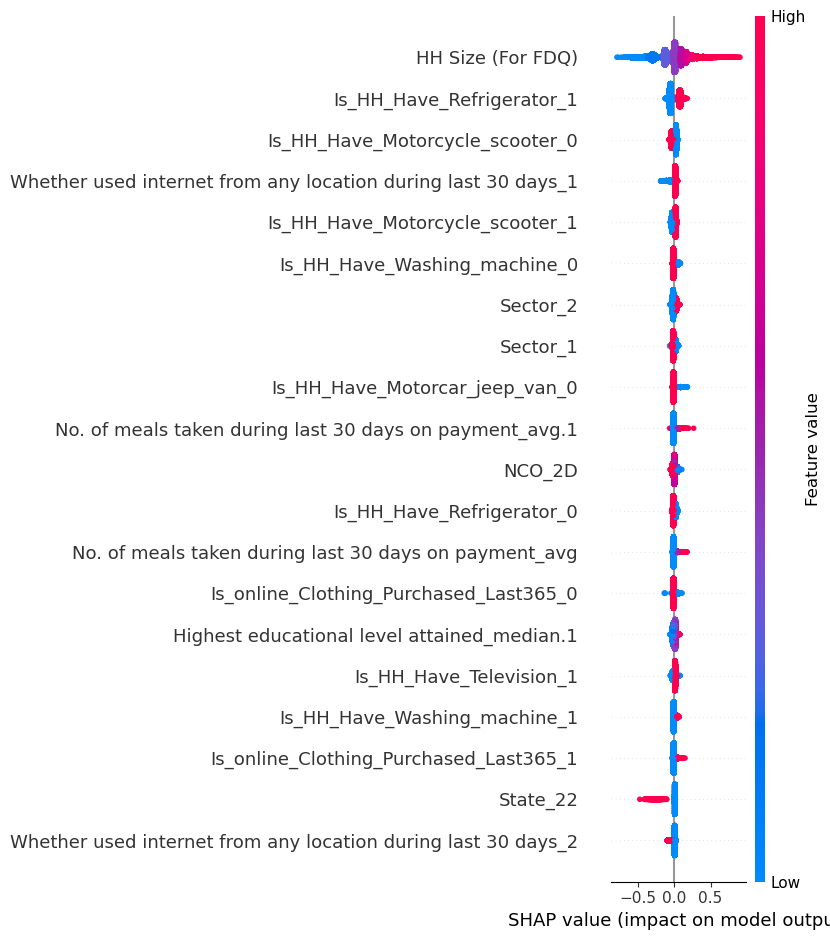

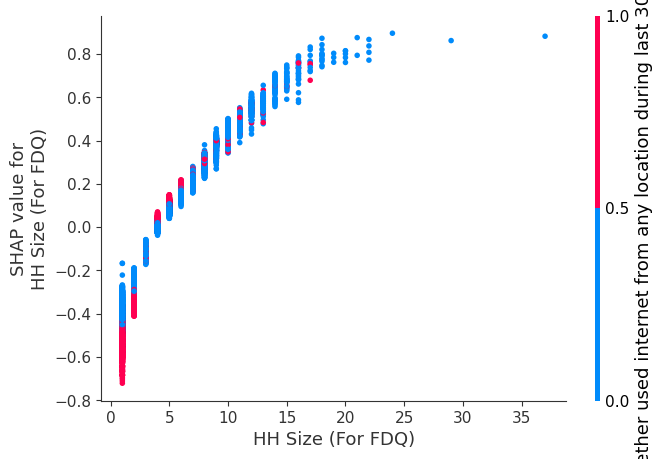

In [49]:
import shap
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define X (features) and y (target)
X_train = d_train.drop(columns=["TotalExpense"])  # Use all features except TotalExpense
y_train = log_train # Log-transformed target

X_test = d_test.drop(columns=["TotalExpense"])  # Use all features except TotalExpense
y_test = log_test  # Log-transformed target

# Train GradientBoosting Model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
gb_model.fit(X_train, y_train)

# Train XGBoost Model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Initialize SHAP Explainers
explainer_gb = shap.Explainer(gb_model, X_train)
explainer_xgb = shap.Explainer(xgb_model, X_train)

# Compute SHAP Values
shap_values_gb = explainer_gb(X_test)
shap_values_xgb = explainer_xgb(X_test)

# Plot SHAP Summary for GradientBoosting
plt.title("SHAP Summary Plot - GradientBoosting")
shap.summary_plot(shap_values_gb, X_test)


# Plot SHAP Dependence Plot for Most Important Feature (Example)
most_important_feature = X_train.columns[np.argmax(np.abs(shap_values_xgb.values).mean(axis=0))]
shap.dependence_plot(most_important_feature, shap_values_xgb.values, X_test)


The model considers household size, ownership of appliances, and internet usage as key indicators.
Larger households tend to have a higher impact on the model’s predictions.
Owning modern appliances (e.g., refrigerator, washing machine) and using the internet contribute significantly to predictions.
The model might be assessing economic conditions, lifestyle, or consumption behavior based on these features.    Feature Importance:

The SHAP values indicate which features are most influential in predicting the monthly per capita income for each household. Features with higher absolute SHAP values have a greater impact on the model's predictions.

Key Features:

Is_HH_Have_Refrigerator_1: Indicates whether the household has a refrigerator. This feature seems to have a significant impact, as having a refrigerator (value 1) is associated with higher income predictions.

Is_HH_Have_Motorcycle_scooter_0/1: The presence or absence of a motorcycle or scooter in the household also affects the prediction. The impact varies depending on whether the household has one (1) or not (0).

Whether used internet from any location during last 30 days_1/2: Internet usage is another important feature. Using the internet (value 1) is likely associated with higher income, while not using it (value 2) might be associated with lower income.

Is_HH_Have_Washing_machine_0/1: The presence of a washing machine also influences the prediction, with having one (1) likely indicating higher income.

Sector_1/2: The sector in which the household is located (possibly urban vs. rural) affects income predictions.

Is_HH_Have_Motorcar_jeep_van_0: Not having a motorcar, jeep, or van (value 0) might be associated with lower income.

No. of meals taken during last 30 days on payment_avg: The average number of meals taken on payment could be a proxy for disposable income, affecting the prediction.

Is_online_Clothing_Purchased_Last365_0/1: Online clothing purchases in the last year might indicate higher income levels.

Highest educational level attained_median.1: Higher educational levels are likely associated with higher income predictions.

Is_HH_Have_Television_1: Having a television is another indicator of higher income.

State_22: The state in which the household is located can also impact income predictions.

SHAP Value Plot:

The SHAP value plot shows the distribution of the impact of each feature on the model's output. Features with a wider spread of SHAP values have a more significant impact on the predictions.

The plot likely shows that features like having a refrigerator, internet usage, and educational level have a broad range of SHAP values, indicating their strong influence on the model's predictions.

Direction of Impact:

Positive SHAP values indicate that the feature increases the predicted income, while negative values indicate a decrease. For example, having a refrigerator (Is_HH_Have_Refrigerator_1) likely has a positive SHAP value, increasing the predicted income.

100%|===================| 52278/52350 [15:13<00:01]        

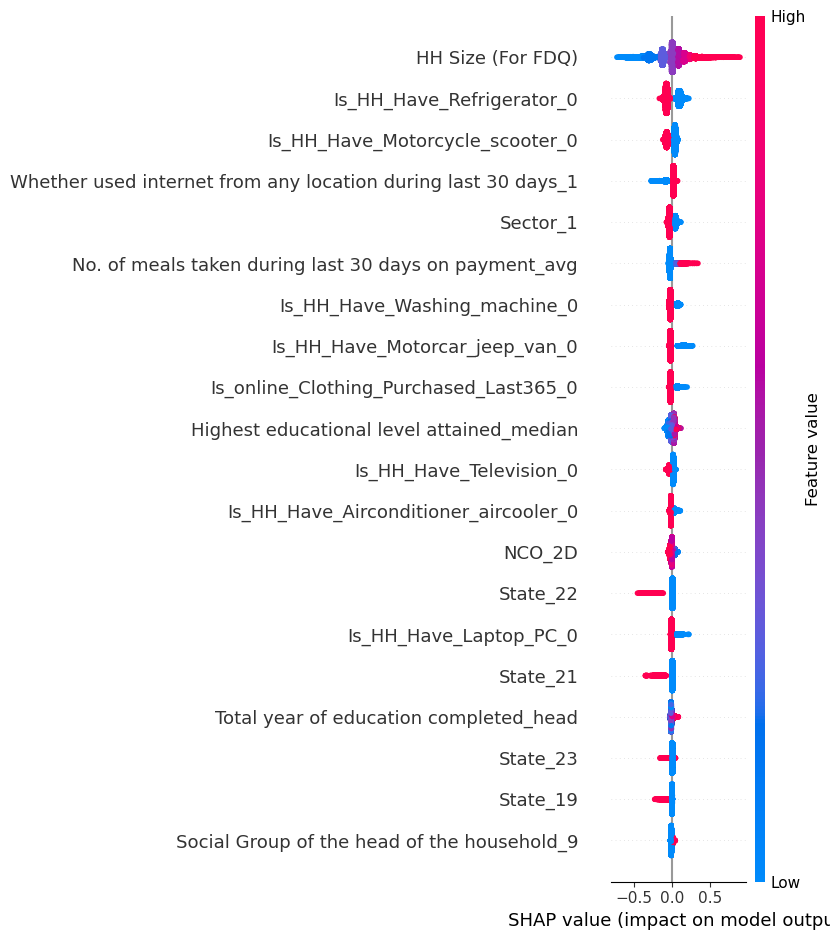

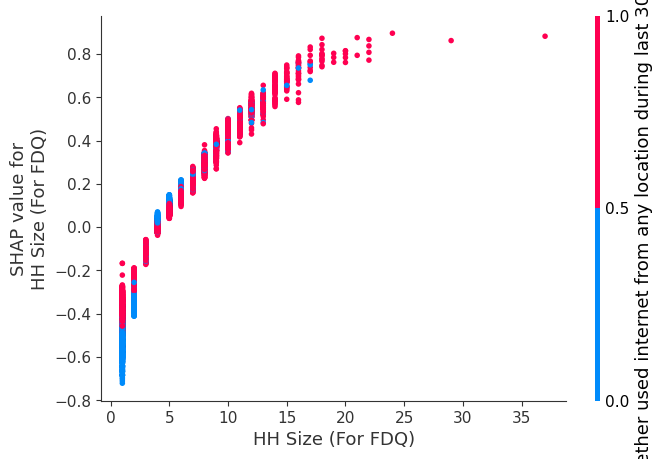

In [50]:
# Define X (features) and y (target)
X_train = d_train.drop(columns=["TotalExpense"])  # Use all features except TotalExpense
y_train = log_train # Log-transformed target

X_test = d_test.drop(columns=["TotalExpense"])  # Use all features except TotalExpense
y_test = log_test  # Log-transformed target

# Train GradientBoosting Model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
gb_model.fit(X_train, y_train)

# Train XGBoost Model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Initialize SHAP Explainers
explainer_gb = shap.Explainer(gb_model, X_train)
explainer_xgb = shap.Explainer(xgb_model, X_train)

# Compute SHAP Values
shap_values_gb = explainer_gb(X_test)
shap_values_xgb = explainer_xgb(X_test)

# Plot SHAP Summary for XGBoost
plt.title("SHAP Summary Plot - XGBoost")
shap.summary_plot(shap_values_xgb, X_test)

# Plot SHAP Dependence Plot for Most Important Feature (Example)
most_important_feature = X_train.columns[np.argmax(np.abs(shap_values_xgb.values).mean(axis=0))]
shap.dependence_plot(most_important_feature, shap_values_xgb.values, X_test)

Feature Importance:

The SHAP values indicate which features are most influential in predicting the monthly per capita income. Features with higher absolute SHAP values have a greater impact on the model's predictions.

Key Features:

Is_HH_Have_Refrigerator_0: Indicates whether the household does not have a refrigerator. This feature seems to have a significant impact, as not having a refrigerator (value 0) is associated with lower income predictions.

Is_HH_Have_Motorcycle_scooter_0: The absence of a motorcycle or scooter in the household affects the prediction, likely indicating lower income.

Whether used internet from any location during last 30 days_1: Internet usage is an important feature. Using the internet (value 1) is likely associated with higher income.

Sector_1: The sector in which the household is located (possibly urban vs. rural) affects income predictions.

No. of meals taken during last 30 days on payment_avg: The average number of meals taken on payment could be a proxy for disposable income, affecting the prediction.

Is_HH_Have_Washing_machine_0: Not having a washing machine (value 0) might be associated with lower income.

Is_HH_Have_Motorcar_jeep_van_0: Not having a motorcar, jeep, or van (value 0) might be associated with lower income.

Is_online_Clothing_Purchased_Last365_0: Not purchasing clothing online in the last year might indicate lower income levels.

Highest educational level attained_median: Higher educational levels are likely associated with higher income predictions.

Is_HH_Have_Television_0: Not having a television (value 0) might be associated with lower income.

Is_HH_Have_Airconditioner_aircooler_0: Not having an air conditioner or air cooler (value 0) might be associated with lower income.

NCO_2D: This could be a classification code that impacts income predictions.

State_22, State_21, State_23, State_19: The state in which the household is located can impact income predictions.

Is_HH_Have_Laptop_PC_0: Not having a laptop or PC (value 0) might be associated with lower income.

Total year of education completed_head: The total years of education completed by the head of the household is likely positively correlated with income.

Social Group of the head of the household_9: The social group of the head of the household can also impact income predictions.

SHAP Value Plot:

The SHAP value plot shows the distribution of the impact of each feature on the model's output. Features with a wider spread of SHAP values have a more significant impact on the predictions.

The plot likely shows that features like having a refrigerator, internet usage, educational level, and state of residence have a broad range of SHAP values, indicating their strong influence on the model's predictions.

Direction of Impact:

Positive SHAP values indicate that the feature increases the predicted income, while negative values indicate a decrease. For example, using the internet (Whether used internet from any location during last 30 days_1) likely has a positive SHAP value, increasing the predicted income

In [64]:
train_significant = d_train[significant_columns]

In [65]:
test_significant = d_test[significant_columns]

In [66]:
print(test_significant.head())

   HH Size (For FDQ)  Is_HH_Have_Refrigerator_1  \
0                  2                          0   
1                  4                          0   
2                  3                          0   
3                  4                          1   
4                  3                          0   

   Is_HH_Have_Motorcycle_scooter_0  \
0                                1   
1                                1   
2                                1   
3                                0   
4                                0   

   Whether used internet from any location during last 30 days_1  \
0                                                  0               
1                                                  1               
2                                                  0               
3                                                  1               
4                                                  1               

   Is_HH_Have_Motorcycle_scooter_1  Is_HH_Have_Washing_

In [59]:
X_test.head()

,HH Size (For FDQ),Male_Count,Female_Count,Other_Count,Age_0_18,Age_18_60,Age_60_above,Highest educational level attained_head,Total year of education completed_head,Highest educational level attained_median,...,Total year of education completed_head.1,Highest educational level attained_median.1,Total year of education completed_median.1,No. of days stayed away from home during last 30 days_avg.1,No. of meals usually taken in a day_avg.1,"No. of meals taken during last 30 days from school, balwadi etc._avg.1",No. of meals taken during last 30 days from employer as perquisites or part of wage_avg.1,No. of meals taken during last 30 days others_avg.1,No. of meals taken during last 30 days on payment_avg.1,No. of meals taken during last 30 days at home_avg.1
0,2,1,1,0,0,1,1,4,7,4.0,...,-0.081445,-0.344770,-0.557010,-0.224775,-1.093958,-0.36204,-0.075528,-0.218042,-0.168243,-0.777935
1,4,2,2,0,2,2,0,7,13,4.0,...,0.962243,-0.344770,0.847679,-0.224775,0.889786,-0.36204,-0.075528,-0.218042,-0.168243,1.072509
2,3,1,2,0,2,1,0,1,0,4.0,...,-1.299081,-0.344770,-0.557010,-0.224775,0.889786,-0.36204,-0.075528,-0.218042,-0.168243,0.455695
3,4,1,3,0,1,2,1,11,18,8.5,...,1.831983,1.226838,2.018253,-0.224775,-1.093958,-0.36204,-0.075528,-0.218042,-0.168243,-0.777935
4,3,1,2,0,0,3,0,3,4,7.0,...,-0.603289,0.702969,1.081794,-0.224775,-1.093958,-0.36204,-0.075528,0.012219,-0.168243,-0.222801


In [70]:
X_train = train_significant  # Use all features except TotalExpense
y_train = log_train # Log-transformed target

X_test = test_significant  # Use all features except TotalExpense
y_test = log_test  # Log-transformed target

In [71]:
# Initialize ML models
models = {
    
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
    
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)  # Predictions are in normal scale
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # Compare with actual values
    r2 = r2_score(y_test, y_pred)
    results[name] = {"RMSE": rmse, "R² Score": r2}
    print(f"{name} → RMSE: {rmse:.4f}, R² Score: {r2:.4f}")

# Convert results to DataFrame and sort by RMSE
results_df = pd.DataFrame(results).T.sort_values(by="RMSE")
print("\nModel Performance Summary:")
print(results_df)


C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


GradientBoosting → RMSE: 0.3621, R² Score: 0.6243
XGBoost → RMSE: 0.3622, R² Score: 0.6242

Model Performance Summary:
                      RMSE  R² Score
GradientBoosting  0.362133  0.624297
XGBoost           0.362189  0.624181


C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

cv_scores = cross_val_score(GradientBoostingRegressor(), X_train, y_train, cv=5, scoring='r2')
print(cv_scores)  # Prints only the mean R² Score


[0.61527127 0.62028879 0.62031978 0.61928542 0.61739916]


In [75]:
#hyperparameter tuning

In [76]:
# Define X (features) and y (target)
X_train = d_train.drop(columns=["TotalExpense"])  # Use all features except TotalExpense
y_train = log_train # Log-transformed target

X_test = d_test.drop(columns=["TotalExpense"])  # Use all features except TotalExpense
y_test = log_test  # Log-transformed target

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [300, 500],
    'learning_rate': [0.05, 0.1],
    'max_depth': [5, 7],
    'subsample': [0.8, 1.0]
}

grid = GridSearchCV(GradientBoostingRegressor(), params, cv=5, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_


In [28]:
#predicted value of y 

In [30]:
# Define X (features) and y (target)
X_train = d_train # Use all features except TotalExpense
y_train = log_train # Log-transformed target

X_test = d_test  # Use all features except TotalExpense
y_test = log_test  # Log-transformed target

In [33]:
# Initialize Linear Regression Model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)  

# Predict using the fitted model
y_train_pred = model.predict(X_train)  # Predictions for training data
y_test_pred = model.predict(X_test)  # Predictions for test data

# Print predictions
print("Predicted Values for Training Set:\n", y_train_pred)
print("Predicted Values for Test Set:\n", y_test_pred)


Predicted Values for Training Set:
 [ 8.80636388  9.09612638 10.58023721 ...  9.84120446 10.48324668
 10.07494336]
Predicted Values for Test Set:
 [8.74239862 9.72263959 9.27111018 ... 9.58701739 9.94024077 9.85954747]


In [ ]:
# tune for xgboost and grient

In [ ]:
import optuna
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

# Define an objective function for XGBoost
def xgb_objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500, step=50),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 1.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 1.0)
    }
    
    model = XGBRegressor(**params, random_state=42)
    score = cross_val_score(model, X_train, y_train, cv=5, scoring="r2").mean()
    return score

# Optimize XGBoost
study_xgb = optuna.create_study(direction="maximize")  # Maximizing R² score
study_xgb.optimize(xgb_objective, n_trials=20)

print("Best XGBoost Params:", study_xgb.best_params)

# Define an objective function for Gradient Boosting
def gbm_objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500, step=50),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0)
    }
    
    model = GradientBoostingRegressor(**params, random_state=42)
    score = cross_val_score(model, X_train, y_train, cv=5, scoring="r2").mean()
    return score

# Optimize Gradient Boosting
study_gbm = optuna.create_study(direction="maximize")
study_gbm.optimize(gbm_objective, n_trials=20)

print("Best Gradient Boosting Params:", study_gbm.best_params)


[I 2025-03-22 10:48:07,720] A new study created in memory with name: no-name-1fbd3427-f6bd-4671-9888-7a92a3901f38
[I 2025-03-22 10:49:53,064] Trial 0 finished with value: 0.7021666797001171 and parameters: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.14713266475028589, 'subsample': 0.6844173175288395, 'colsample_bytree': 0.7001297954226571, 'reg_alpha': 0.8446010195818651, 'reg_lambda': 0.20369404966244253}. Best is trial 0 with value: 0.7021666797001171.
[I 2025-03-22 10:52:23,403] Trial 1 finished with value: 0.7285720485773505 and parameters: {'n_estimators': 150, 'max_depth': 7, 'learning_rate': 0.19595908990598715, 'subsample': 0.904461421578466, 'colsample_bytree': 0.615095378773776, 'reg_alpha': 0.8667695841848342, 'reg_lambda': 0.8202751742892495}. Best is trial 1 with value: 0.7285720485773505.
[I 2025-03-22 10:55:45,789] Trial 2 finished with value: 0.7216427582873848 and parameters: {'n_estimators': 250, 'max_depth': 5, 'learning_rate': 0.14870227390710783, 'subs

In [74]:
import numpy as np
import pandas as pd
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

X_train = d_train  # Use all features except TotalExpense
y_train = log_train # Log-transformed target

X_test = d_test  # Use all features except TotalExpense
y_test = log_test  # Log-transformed target

# Initialize ML models
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01),
    "DecisionTree": DecisionTreeRegressor(max_depth=6, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42),
    "LightGBM": lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42),
    "CatBoost": cb.CatBoostRegressor(n_estimators=100, learning_rate=0.1, depth=6, verbose=0, random_state=42),
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate RMSE, R², and MAPE for train & test data
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_r2 = r2_score(y_train, y_train_pred)
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)

    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

    # Store results
    results[name] = {
        "Train RMSE": train_rmse, "Train R²": train_r2, "Train MAPE": train_mape,
        "Test RMSE": test_rmse, "Test R²": test_r2, "Test MAPE": test_mape
    }

    print(f"{name} → Train RMSE: {train_rmse:.4f}, Train R²: {train_r2:.4f}, Train MAPE: {train_mape:.4f}, "
          f"Test RMSE: {test_rmse:.4f}, Test R²: {test_r2:.4f}, Test MAPE: {test_mape:.4f}")

# Convert results to DataFrame and sort by Test RMSE
results_df = pd.DataFrame(results).T.sort_values(by="Test RMSE")
print("\nModel Performance Summary:")
print(results_df)


C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


LinearRegression → Train RMSE: 0.3460, Train R²: 0.6541, Train MAPE: 0.0274, Test RMSE: 0.3490, Test R²: 0.6510, Test MAPE: 0.0276


C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Ridge → Train RMSE: 0.3460, Train R²: 0.6541, Train MAPE: 0.0274, Test RMSE: 0.3490, Test R²: 0.6510, Test MAPE: 0.0276


C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Lasso → Train RMSE: 0.3798, Train R²: 0.5831, Train MAPE: 0.0303, Test RMSE: 0.3823, Test R²: 0.5813, Test MAPE: 0.0305


C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


DecisionTree → Train RMSE: 0.3906, Train R²: 0.5593, Train MAPE: 0.0313, Test RMSE: 0.3926, Test R²: 0.5585, Test MAPE: 0.0314


C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


GradientBoosting → Train RMSE: 0.3221, Train R²: 0.7001, Train MAPE: 0.0255, Test RMSE: 0.3302, Test R²: 0.6876, Test MAPE: 0.0260


C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


XGBoost → Train RMSE: 0.3229, Train R²: 0.6988, Train MAPE: 0.0256, Test RMSE: 0.3305, Test R²: 0.6870, Test MAPE: 0.0261


LightGBMError: Do not support special JSON characters in feature name.

In [61]:
significant_columns = ['HH Size (For FDQ)', 'Male_Count', 'Female_Count', 'Other_Count', 'Age_0_18', 'Age_18_60', 'Age_60_above', 'Highest educational level attained_head', 'Total year of education completed_head', 'Highest educational level attained_median', 'Total year of education completed_median', 'No. of days stayed away from home during last 30 days_avg', 'No. of meals usually taken in a day_avg', 'No. of meals taken during last 30 days from school, balwadi etc._avg', 'No. of meals taken during last 30 days from employer as perquisites or part of wage_avg', 'No. of meals taken during last 30 days others_avg', 'No. of meals taken during last 30 days on payment_avg', 'No. of meals taken during last 30 days at home_avg', 'Sector_1', 'Sector_2', 'State_1', 'State_2', 'State_3', 'State_4', 'State_5', 'State_6', 'State_7', 'State_8', 'State_9', 'State_10', 'State_11', 'State_12', 'State_13', 'State_14', 'State_15', 'State_16', 'State_17', 'State_18', 'State_19', 'State_20', 'State_21', 'State_22', 'State_23', 'State_24', 'State_25', 'State_27', 'State_28', 'State_29', 'State_30', 'State_31', 'State_32', 'State_33', 'State_34', 'State_35', 'State_36', 'State_37', 'Household Type_1', 'Household Type_2', 'Household Type_3', 'Household Type_4', 'Household Type_5', 'Household Type_6', 'Household Type_9', 'NCO_2D_11', 'NCO_2D_12', 'NCO_2D_13', 'NCO_2D_14', 'NCO_2D_21', 'NCO_2D_22', 'NCO_2D_23', 'NCO_2D_24', 'NCO_2D_25', 'NCO_2D_26', 'NCO_2D_31', 'NCO_2D_32', 'NCO_2D_33', 'NCO_2D_34', 'NCO_2D_35', 'NCO_2D_41', 'NCO_2D_42', 'NCO_2D_43', 'NCO_2D_44', 'NCO_2D_51', 'NCO_2D_52', 'NCO_2D_53', 'NCO_2D_54', 'NCO_2D_61', 'NCO_2D_62', 'NCO_2D_63', 'NCO_2D_71', 'NCO_2D_72', 'NCO_2D_73', 'NCO_2D_74', 'NCO_2D_75', 'NCO_2D_81', 'NCO_2D_82', 'NCO_2D_83', 'NCO_2D_91', 'NCO_2D_92', 'NCO_2D_93', 'NCO_2D_94', 'NCO_2D_95', 'NCO_2D_96', 'NIC_2D_10', 'NIC_2D_11', 'NIC_2D_12', 'NIC_2D_13', 'NIC_2D_14', 'NIC_2D_15', 'NIC_2D_16', 'NIC_2D_17', 'NIC_2D_18', 'NIC_2D_19', 'NIC_2D_20', 'NIC_2D_21', 'NIC_2D_22', 'NIC_2D_23', 'NIC_2D_24', 'NIC_2D_25', 'NIC_2D_26', 'NIC_2D_27', 'NIC_2D_28', 'NIC_2D_29', 'NIC_2D_30', 'NIC_2D_31', 'NIC_2D_32', 'NIC_2D_33', 'NIC_2D_35', 'NIC_2D_36', 'NIC_2D_37', 'NIC_2D_38', 'NIC_2D_39', 'NIC_2D_41', 'NIC_2D_42', 'NIC_2D_43', 'NIC_2D_45', 'NIC_2D_46', 'NIC_2D_47', 'NIC_2D_49', 'NIC_2D_50', 'NIC_2D_51', 'NIC_2D_52', 'NIC_2D_53', 'NIC_2D_55', 'NIC_2D_56', 'NIC_2D_58', 'NIC_2D_59', 'NIC_2D_60', 'NIC_2D_61', 'NIC_2D_62', 'NIC_2D_63', 'NIC_2D_64', 'NIC_2D_65', 'NIC_2D_66', 'NIC_2D_68', 'NIC_2D_69', 'NIC_2D_70', 'NIC_2D_71', 'NIC_2D_72', 'NIC_2D_73', 'NIC_2D_74', 'NIC_2D_75', 'NIC_2D_77', 'NIC_2D_78', 'NIC_2D_79', 'NIC_2D_80', 'NIC_2D_81', 'NIC_2D_82', 'NIC_2D_84', 'NIC_2D_85', 'NIC_2D_86', 'NIC_2D_87', 'NIC_2D_88', 'NIC_2D_89', 'NIC_2D_90', 'NIC_2D_91', 'NIC_2D_92', 'NIC_2D_93', 'NIC_2D_94', 'NIC_2D_95', 'NIC_2D_96', 'NIC_2D_97', 'NIC_2D_99', 'Religion of the head of the household_0', 'Religion of the head of the household_1', 'Religion of the head of the household_2', 'Religion of the head of the household_3', 'Religion of the head of the household_4', 'Religion of the head of the household_5', 'Religion of the head of the household_6', 'Religion of the head of the household_7', 'Religion of the head of the household_9', 'Social Group of the head of the household_0', 'Social Group of the head of the household_1', 'Social Group of the head of the household_2', 'Social Group of the head of the household_3', 'Social Group of the head of the household_9', 'Is_online_Clothing_Purchased_Last365_0', 'Is_online_Clothing_Purchased_Last365_1', 'Is_online_Footwear_Purchased_Last365_0', 'Is_online_Footwear_Purchased_Last365_1', 'Is_online_Furniture_fixturesPurchased_Last365_0', 'Is_online_Furniture_fixturesPurchased_Last365_1', 'Is_online_Mobile_Handset_Purchased_Last365_0', 'Is_online_Mobile_Handset_Purchased_Last365_1', 'Is_online_Personal_Goods_Purchased_Last365_0', 'Is_online_Personal_Goods_Purchased_Last365_1', 'Is_online_Recreation_Goods_Purchased_Last365_0', 'Is_online_Recreation_Goods_Purchased_Last365_1', 'Is_online_Household_Appliances_Purchased_Last365_0', 'Is_online_Household_Appliances_Purchased_Last365_1', 'Is_online_Crockery_Utensils_Purchased_Last365_0', 'Is_online_Crockery_Utensils_Purchased_Last365_1', 'Is_online_Sports_Goods_Purchased_Last365_0', 'Is_online_Sports_Goods_Purchased_Last365_1', 'Is_online_Medical_Equipment_Purchased_Last365_0', 'Is_online_Medical_Equipment_Purchased_Last365_1', 'Is_online_Bedding_Purchased_Last365_0', 'Is_online_Bedding_Purchased_Last365_1', 'Is_HH_Have_Television_0', 'Is_HH_Have_Television_1', 'Is_HH_Have_Radio_0', 'Is_HH_Have_Radio_1', 'Is_HH_Have_Laptop_PC_0', 'Is_HH_Have_Laptop_PC_1', 'Is_HH_Have_Mobile_handset_0', 'Is_HH_Have_Mobile_handset_1', 'Is_HH_Have_Bicycle_0', 'Is_HH_Have_Bicycle_1', 'Is_HH_Have_Motorcycle_scooter_0', 'Is_HH_Have_Motorcycle_scooter_1', 'Is_HH_Have_Motorcar_jeep_van_0', 'Is_HH_Have_Motorcar_jeep_van_1', 'Is_HH_Have_Trucks_0', 'Is_HH_Have_Trucks_1', 'Is_HH_Have_Animal_cart_0', 'Is_HH_Have_Animal_cart_1', 'Is_HH_Have_Refrigerator_0', 'Is_HH_Have_Refrigerator_1', 'Is_HH_Have_Washing_machine_0', 'Is_HH_Have_Washing_machine_1', 'Is_HH_Have_Airconditioner_aircooler_0', 'Is_HH_Have_Airconditioner_aircooler_1', 'Marital Status_head_1', 'Marital Status_head_2', 'Marital Status_head_3', 'Marital Status_head_4', 'Whether used internet from any location during last 30 days_1', 'Whether used internet from any location during last 30 days_2']

In [63]:
d_train = d_train[significant_columns]
d_test= d_test[significant_columns]

In [71]:
# Define X (features) and y (target)
X_train = d_train  # Use all features except TotalExpense
y_train = log_train # Log-transformed target

X_test = d_test  # Use all features except TotalExpense
y_test = log_test  # Log-transformed target
